# Capstone Week 5
---

# Index
- [Capstone Objectives](#Capstone-Objectives)
- [Read in Data](#Read-in-Data)
    - [Merge 2018 and 2019](#Merge-2018-and-2019)
    - [Make advisor dictionary mapper](#Make-advisor-dictionary-mapper)
- [Pandas Profiling](#Pandas-Profiling)
- [Missing Data](#Missing-Data)
    - [How big of a problem is missing data?](#How-big-of-a-problem-is-missing-data?)
    - [Three types of missing data](#Three-types-of-missing-data)
    - [Strategies for handling missing data](#Strategies-for-handling-missing-data)
        - [Weight Class Adjustment Example](#Weight-Class-Adjustment-Example)
    - [Imputation Strategies](#Imputation-Strategies)
    - [Missingness Tests](#Missingness-Tests)
    - [MCAR Data](#MCAR-Data)
    - [MAR Data](#MAR-Data)
    - [NMAR Data](#NMAR-Data)
    - [Missing data workflow](#Missing-data-workflow)
- [Data Cleaning](#Data-Cleaning)
    - [Train-Test-Split](#Train-Test-Split)
    - [Custom Cleaning Functions](#Custom-Cleaning-Functions)
    - [Create Cleaning Pipeline](#Create-Cleaning-Pipeline)
- [Model building](#Model-building)
- [Make predictions](#Make-predictions)
- [Feature Engineering](#Feature-Engineering)
    - [Variable Inflation Factor (VIF)](#Variable-Inflation-Factor-(VIF))
- [Residuals](#Residuals)
- [Classification](#Classification)
- [Model Interpretation](#Model-Interpretation)

# Capstone Objectives
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018
- Estimate the probability of adding a new fund in 2019

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50)

[Back to Top](#Index)
# Read in Data

In [50]:
df18 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions19")

## Merge 2018 and 2019

In [51]:
df = pd.merge(
    df18, 
    df19, 
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [52]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date_2018,sales_12M_2019,new_Fund_added_12M_2019,refresh_date_2019
0,0047433,21.0,38.0,NaN,1.0,5.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,8.0,1.0,237480.11,250.0,19682.0,-1496.745,-102496.165,NaN,-47342.32,284737.93,84.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122866.04,114614.07,0.0,0.0,2018-12-31,18633.105,NaN,2019-12-31
1,4461312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,19629.00,NaN,NaN,NaN,NaN,NaN,0.00,19629.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19629.00,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
2,4491079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1758.70,NaN,NaN,NaN,NaN,NaN,0.00,1758.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1758.70,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
3,0107408,20.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,57943.00,5459.0,52484.0,NaN,NaN,1.0,0.00,0.00,57943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57943.00,0.00,0.0,0.0,2018-12-31,93212.000,1.0,2019-12-31
4,85101140503769936458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8573.59,NaN,NaN,NaN,NaN,NaN,-8573.59,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8573.59,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31


## Make advisor dictionary mapper

In [53]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [54]:
adviser_lookup[123]

'85201142414218755394'

[Back to Top](#Index)
# Pandas Profiling

In [55]:
# !conda install -yc conda-forge pandas-profiling

In [56]:
from pandas_profiling import ProfileReport

In [57]:
missing_diagrams = {
    'heatmap': True, 'dendrogram': True, 'matrix': True, 'bar': True
}

In [58]:
# profile = ProfileReport(df, title='Nuveen Profile Report')

In [59]:
# profile.to_widgets()

In [60]:
profile.to_file(output_file="nuveen_profiling.html")

[Back to Top](#Index)
# Missing Data

Up to this point we haven't put much thought into dealing with missing data. Missing data is EVERYWHERE and it's important to know how to do data science with missing data. It can significantly undermine our results!

## How big of a problem is missing data?

This is difficult question because we only see what we observe. We can use simulated data to help answer this question, but we cannot quantify the impact of missing data in our real data projects.

See this resource: https://github.com/matthewbrems/jupytercon-missing-data-2018

## Three types of missing data

1. **MCAR**: Missing Completely at Random
    - Some intern spills their coffee on your surveys in random order
    - Flip coin of missingness
    
    
2. **MAR**: Missing at Random
    - I adminster a survey about income. Those who aare female are less likely to respond to the question about income.
    - Missing data is conditional on data have observed.


3. **NMAR**: Not Missing at Random (Worst type!)
    - I adminster a survey that includes a question about income. Those who have lower incomes are less likely to respond to the question about income.
    - Data of interest are systematically different for respondents and nonrespondents
    - Whether the data are missing or not depends on the value of the unobserved value itself!

[Back to Top](#Index)
## Strategies for handling missing data
1. **Avoid it** (best option, if possible)
    - Use sound design when collecting data
    - Improve survey questioning and design
    - Drop all rows with _any_ missing value
    
    
2. **Ignore it** (second best option, if possible): 
    - Assume your respondents are close enough to the sample of non-respondents
    - Drop any observation with _any_ missing value
    
    
3. **Account for it** (most common):
    - Weight class adjustments
    - Determine why data are missing
    - Employ a strategy for accounting for missing data

[Back to Top](#Index)
### Weight Class Adjustment Example

I'm estimating job satisfaction among two departments: finance and accounting. Both departments are the same size (A: 50%, F: 50%).

$$W_{finance} = \frac{true\;proportion}{proportion\;of\;responses} = \frac{0.50}{0.25} = 2$$
<br>
$$W_{accounting} = \frac{true\;proportion}{proportion\;of\;responses} = \frac{0.50}{0.75} = \frac{2}{3}$$

[Back to Top](#Index)
## Imputation Strategies

1. Deductive Imputation: use logical relationships to fill in value **VALID**

    - Respondent says the were not victim of crime, but left "victim of a violent crime" question blank.
    - If someone has 2 children in year 1, `NaN` children in year 2, and 2 children in year 3, we can _probably_ impute that in year 2 they still had 2 children.
    - PRO: Valid method, requires minimal "inference"
    - CON: Time consuming and requires specific coding


2. Mean/Median/Mode: use measure central tendency to fill value **INVALID**

     - PRO: Easy to implement
     - CON: Significantly distorts histogram (underestimates variance) and results will look more precise than they really are
     

3. Regression Imputation: replace missing based on predicted value from regression line **INVALID**

    - PRO: Easy to understand
    - CON: Distorts distribution and underestimates variance still because there is no randomness in the prediction
    
    
4. Stochastic Regression Imputation:

    - Replace missing with predicted value from regression line plus random draw from normal distribution `N(0, s)`, where `s` is estimataed from model residuals **INVALID**
    
    - PRO: Easy to understand and better than just regression technique
    - CON: Still under estimate variance because selecting single point from normal distribution of error
    
    
5. Multiply Stochastic Regression Imputation: pull multiple values from distribution. Replace missing with predicted value from line with random error.

    - PRO: Better than number 4
    - CON: All `Beta` coefficients are constant, so still not credible
    
    
6. Proper Multiply Stochastic Regression Imputation: Called Multiple Imputation by Chained Equations [(MICE)](https://stats.stackexchange.com/questions/421545/multiple-imputation-by-chained-equations-mice-explained)

    - Create `n` copies of your data set (let's say, 10)
    - For each dataset:
        - Generate coefficients for your regression model
            - For each missing value:
                - Replace `NaN` with a value predicted from a regression
            - Do your "final analysis" or generate your final prediction
    - Aggregate your analysis/predictions across all data sets so you have one complete analysis
    - These predictions were created by properly estimating the variance in your data
    - PRO: Very good method, **VALID**
    - CON: Takes more effort to implement (`fancyimpute` or `mice` in R)

[Back to Top](#Index)
## Missingness Tests

1. Little's Test for MCAR
    - $H_0 : MCAR$
    - $H_A : MAR$
    - There is no test for NMAR!
2. Split your data into "observed" and "unobserved" and compare them
    - Split missing `income` and observed `income` sets. Do the other variables have the same distributions?
3. Think about missing data process. Can you come up with a reasonable answer based on how missing data came about?

[Back to Top](#Index)
## MCAR Data

Use any of the methods we previously discussed:
- Deductive imputation
- Proper imputation
- Stochastic Regression Imputation
- Complete-Case Removal (unbiased, but variance will be higher because our sample size is smaller!)

## MAR Data

Use one of the following methods:
- Deductive imputation
- Proper imputation
- Stochastic Regression Imputation

## NMAR Data

Use one of the following methods:
- Deductive imputation
- Advanced methods: selection models and pattern mixture models

[Back to Top](#Index)
## Missing data workflow
1. How much missing data do I have?
2. For each variable, estimate the type of missing data
3. What is the best method for handling missing values?

[Back to Top](#Index)
# Data Cleaning

In [61]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID', 
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

In [62]:
def bin_y_class(series):
    series = series.apply(lambda x: 1 if x >=1 else 0)
    return series

In [63]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y_reg = df['sales_12M_2019']
y_cl = bin_y_class(df['new_Fund_added_12M_2019'])

In [64]:
y_cl.value_counts()

0    7484
1    2521
Name: new_Fund_added_12M_2019, dtype: int64

## Train-Test-Split

In [65]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=24
)
y_train_cl, y_test_cl = y_cl[y_train_reg.index], y_cl[y_test_reg.index]

## Custom Cleaning Functions

In [66]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()


def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    elif isinstance(df, type(pd.DataFrame())):
        num_df = df.select_dtypes(include=['number']).fillna(0)
        non_num_df = df.select_dtypes(exclude=['number'])
        return pd.concat([num_df, non_num_df], axis=1)
    else:
        return np.nan_to_num(df)

def negative_to_zero(series):
    '''fill negative values to zero'''
    if isinstance(series, type(pd.Series(dtype='float64'))):
        return series.apply(lambda x: max(0, x))
    else:
        return series

[Back to Top](#Index)
## Create Cleaning Pipeline

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

Transformers

In [68]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)
negative_to_zero_trans = FunctionTransformer(negative_to_zero)

Make pipeline for target variable

In [69]:
targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('negative_to_zero', negative_to_zero_trans)
#     ('num_imp', SimpleImputer(strategy='median'))
])

targ_pipe.fit(y_train_reg.to_frame())

y_train_reg = targ_pipe.fit_transform(y_train_reg) # fit and transform TRAINING
y_train_cl = targ_pipe.fit_transform(y_train_cl)

y_test_reg = targ_pipe.transform(y_test_reg) # transform only TESTING
y_test_cl = targ_pipe.transform(y_test_cl) # transform only TESTING

Make pipeline for features

In [70]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

train_array = feat_pipe.fit(X_train, y_train_reg).transform(X_train)

X_train_prepared = pd.DataFrame(
    train_array,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [71]:
X_train_prepared.head(2)

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
4081,-0.131327,-0.100418,-0.210641,-0.198657,-0.153437,-0.626787,-0.43,-0.441804,0.201462,-0.868033,-0.53463,-0.562039,-0.372488,0.065543,-0.088949,-0.083247,-0.154606,0.090417,0.156246,0.436844,-0.026493,-0.070601,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,-0.040002,-0.070366,-0.030628,-0.093547,-0.018485,-0.056351,-0.057933,-0.016559,-0.070033
184,0.064598,-0.068134,-0.210641,-0.087441,1.954284,1.399401,-0.43,0.296800,1.188127,1.034363,-0.53463,0.777535,3.177868,1.018590,-0.124508,-0.082219,-0.139641,0.090417,0.071676,3.848384,0.050153,-0.166822,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,0.047651,1.121516,-0.030628,-0.093547,-0.018485,-0.160696,-0.158246,-0.016559,3.269629


**TRANSFORM** the test set (Do NOT fit the pipeline on testing!)

In [72]:
X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

In [73]:
X_test_prepared.head(2)

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
2052,-0.199901,-0.095806,-0.210641,-0.087441,-0.574981,-0.221549,-0.43,0.296800,-0.785202,0.083165,-0.53463,0.777535,-0.372488,0.065543,-0.262627,-0.083366,-0.154761,-0.569226,0.096033,-0.416042,-0.518428,-0.081085,-0.059801,-0.012455,-0.023802,6.485925,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.263819,-0.057933,-0.016559,-0.070033
2758,-0.160716,-0.049687,-0.210641,-0.198657,-0.153437,0.588926,-0.43,-0.441804,0.201462,1.034363,-0.53463,-0.562039,-0.695247,-0.887503,-0.103511,-0.081921,-0.153989,0.090417,0.146670,-0.416042,-0.036794,-0.081085,-0.067561,-0.012455,-0.023802,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.073685,-0.057933,-0.016559,-0.070033


[Back to Top](#Index)
# Model building

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA, TruncatedSVD
import xgboost as xgb

In [118]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
#     ('SVD', TruncatedSVD(n_components=3)),
#     ('select', SelectFromModel(DecisionTreeRegressor())),
    ('LinearRegression', LinearRegression())
#     ('xgbr', xgb.XGBRegressor()),
])

In [127]:
X_train

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date_2018,refresh_date_2019
4081,85201151104552899957,7.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,30837.460,23.95,167.57,NaN,NaN,1.0,0.000,30645.94,0.00,0.0,0.00,0.00,0.0,191.52,191.52,0.0,0.0,0.0,30645.940,0.00,0.0,0.00,2018-12-31,2019-12-31
184,0210460,27.0,7.0,NaN,1.0,6.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,12.0,2.0,-90841.550,230.79,16380.65,NaN,-62861.42,5.0,112664.500,-250621.31,0.00,0.0,0.00,0.00,0.0,47115.26,47115.26,0.0,0.0,0.0,-268165.380,-178243.12,0.0,308451.69,2018-12-31,2019-12-31
186,0015023,3.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,1.0,4330024.490,NaN,551269.50,NaN,NaN,NaN,4501498.800,0.00,0.00,0.0,-171474.31,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000,4330024.49,0.0,0.00,2018-12-31,2019-12-31
230,4311030,42.0,14.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,-4025438.070,NaN,83491.48,NaN,-198505.61,NaN,50498.620,-4069339.40,0.00,0.0,0.00,-6597.29,0.0,0.00,0.00,0.0,0.0,0.0,-92122.390,-4069339.40,0.0,136023.72,2018-12-31,2019-12-31
6327,85102141174943110922,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-52438.020,NaN,NaN,NaN,-3808.12,NaN,-3808.120,-48629.90,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,-52438.020,0.00,0.0,0.00,2018-12-31,2019-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,85201110265340471308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,159685.970,NaN,NaN,NaN,NaN,NaN,159685.970,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,159685.970,0.00,0.0,0.00,2018-12-31,2019-12-31
5249,85102113715228199443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-60046.960,NaN,NaN,NaN,NaN,NaN,-7266.770,-52780.19,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,-60046.960,0.00,0.0,0.00,2018-12-31,2019-12-31
3473,4300883,15.0,5.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,394988.300,121357.97,8841.18,-3870.000,-2150.00,NaN,0.000,394988.30,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,-5976.060,400964.36,0.0,0.00,2018-12-31,2019-12-31
8535,0328129,1.0,8.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,139198.975,NaN,3700.81,-7528.145,-19015.82,1.0,135498.165,0.00,3700.81,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,139198.975,0.00,0.0,0.00,2018-12-31,2019-12-31


In [129]:
ss = StandardScaler()
ss.fit(X_train[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0))

StandardScaler()

In [130]:
ss.transform(X_train[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0))

array([[-0.13132686, -0.10041755],
       [ 0.06459803, -0.06813442],
       [-0.17051184, -0.10041755],
       ...,
       [-0.05295691, -0.07735817],
       [-0.19010433, -0.06352255],
       [-0.19990057, -0.10041755]])

In [132]:
ss.transform(X_test[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0))

array([[-0.19990057, -0.09580568],
       [-0.1607156 , -0.04968692],
       [-0.19990057, -0.10041755],
       ...,
       [ 0.17235672, -0.08658192],
       [-0.19990057, -0.09580568],
       [-0.06275315,  0.36538188]])

In [96]:
[col for col in X_train.columns if '10K' in col]

['no_of_sales_12M_10K',
 'no_of_Redemption_12M_10K',
 'no_of_fund_sales_12M_10K',
 'no_of_funds_Redemption_12M_10K',
 'no_of_assetclass_sales_12M_10K',
 'no_of_assetclass_Redemption_12M_10K']

In [97]:
new_X_train = X_train[[col for col in X_train.columns if '10K' in col]]

In [119]:
feat_pipe.fit(new_X_train, y_train_reg)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x1a24e5af0>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x1a24e59d0>)),
                ('StandardScaler', StandardScaler()),
                ('LinearRegression', LinearRegression())])

[Back to Top](#Index)
# Make predictions

In [120]:
test_preds = feat_pipe.predict(X_test_prepared[[col for col in X_train.columns if '10K' in col]])
test_preds

array([-33892.25870975,  67576.53318334,  67576.53318334, ...,
       -63094.53661885, -33892.25870975, -78217.09117881])

# Make Function to output deciles

In [106]:
# def output_deciles(X, predictions):
#     sort_preds = sorted(predictions, reverse=True)
#     pred_labels = pd.qcut(sort_preds, 10, labels=False)
#     X['deciles'] = pred_labels
#     return X

In [121]:
bin_labs = np.array(np.arange(10).tolist()[::-1])+1

In [123]:
pd.qcut(profit_sorted, 10, bin_labs)

ValueError: Bin labels must be one fewer than the number of bin edges

In [114]:
profit_sorted = test_preds.sort_values(ascending=False)

In [115]:
X_test_prepared.loc[profit_sorted.index, 'decile'] = pd.qcut(profit_sorted, 10, bin_labs)

ValueError: Bin edges must be unique: array([-394431.625     ,   50755.20703125,   50755.20703125,
         50755.20703125,   50755.20703125,   50755.20703125,
         50755.20703125,   50755.20703125,   50755.20703125,
         50755.20703125, 8725176.        ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [110]:
test_preds = pd.Series(test_preds, index=y_test_reg.index)

In [111]:
output_deciles(X_test_prepared, test_preds)

ValueError: Bin edges must be unique: array([-394431.625     ,   50755.20703125,   50755.20703125,
         50755.20703125,   50755.20703125,   50755.20703125,
         50755.20703125,   50755.20703125,   50755.20703125,
         50755.20703125, 8725176.        ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

[Back to Top](#Index)
# Classification Evaluation

In [80]:
from sklearn.metrics import classification_report

In [81]:
y_test_cl.value_counts()

0    1866
1     636
Name: new_Fund_added_12M_2019, dtype: int64

In [82]:
print(classification_report(y_test_cl, test_preds))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1866
           1       0.52      0.03      0.05       636

    accuracy                           0.75      2502
   macro avg       0.63      0.51      0.45      2502
weighted avg       0.69      0.75      0.65      2502



In [90]:
# conda install -yc conda-forge scikit-plot

In [86]:
import scikitplot as skplt

In [92]:
test_pred_proba = feat_pipe.predict_proba(X_test_prepared[[col for col in X_train.columns if '10K' in col]])

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

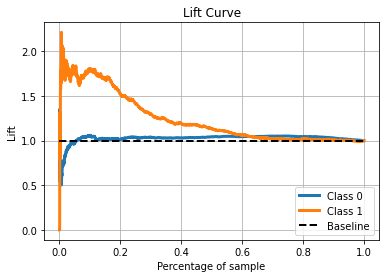

In [93]:
skplt.metrics.plot_lift_curve(y_test_cl, test_pred_proba)

[Back to Top](#Index)
# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
-cross_validate(feat_pipe, X_train_prepared, y_train_reg, scoring='neg_root_mean_squared_error')['test_score']

In [ ]:
def evaluate_model(model, X, y):
    print("Cross Validation Scores:")
    print(cross_validate(model, X, y, scoring='neg_root_mean_squared_error')['test_score'])
    print('-'*55)
    preds = np.exp(model.predict(X))
    lim = max(preds.max(), y.max())
    fig, ax = plt.subplots(1,1,figsize=(7,5))
    ax.scatter(x=y, y=preds, alpha=0.4)
    ax.plot([0, 10000], [0, 10000])
    ax.set_xlim([0, 10000])
    ax.set_ylim([0, 10000])
    ax.set_title("Actual vs Predicted - Regression")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted");

In [ ]:
evaluate_model(feat_pipe, X_train_prepared, y_train_reg)

In [ ]:
y_train_reg_log = np.log(y_train_reg+1)
y_test_reg_log = np.log(y_test_reg+1)

In [ ]:
feat_pipe.fit(X_train_prepared, y_train_reg_log)

In [ ]:
feat_pipe.predict(X_test_prepared)[0]

In [ ]:
np.exp(1.5966611)

In [ ]:
evaluate_model(feat_pipe, X_train, y_train_reg_log)

In [ ]:
evaluate_model(feat_pipe, X_test, y_test_reg_log)

[Back to Top](#Index)
# Feature Engineering

**What is feature engineering**?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

Feature engineering is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms. Unless we're working with the same data over and over again, this isn't something we can automate. It will require creativity and a good, thorough understanding of our data.

Regression results can change significantly depending on feature selection. Let's take a closer look at our features.

In [ ]:
X_train_prepared.corr().style.background_gradient().set_precision(2)

In [ ]:
X_train_prepared.hist(bins=40, figsize=(16,10));

[Back to Top](#Index)
## Variable Inflation Factor (VIF)

VIF measures the amount of multicollinearity in a set of multiple regressors, by evaluating how much the variance of the independent variable is inflated by it's interaction with other independent variables. VIF threshold of 5 to 10 are acceptable, but values above 10 are too high.  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [ ]:
funds = pd.concat([X_train_prepared, y_train_reg.to_frame()], axis=1)
features = funds.columns.tolist()
target = 'sales_12M_2019'

In [ ]:
transformer = ReduceVIF()

X_tr_vif = transformer.fit_transform(X_train_prepared, y_train_reg)
X_tr_vif.head()

[Back to Top](#Index)
# Residuals

In [ ]:
y_test_preds = feat_pipe.predict(X_test_prepared)

In [ ]:
# get residuals
residuals = y_test_preds - y_test_reg

In [ ]:
# plot predictions vs residuals
fig, axes = plt.subplots(2,2,figsize=(14,10))

# plot scatter on upper right plot
axes[0,0].scatter(x=y_test_preds, y=residuals, alpha=0.5)
axes[0,0].set(xlabel="Residuals",ylabel="Predictions");

# plot hist on upper left plot
axes[0,1].hist(residuals, bins=50)
axes[0,1].set(xlabel='Residuals', ylabel='Frequency');

In [ ]:
from statsmodels.api import qqplot

In [ ]:
axes[1,0].set_ylim([-3.5, 3.5])
axes[1,0].set_xlim([-3.5, 3.5])

In [ ]:
qqplot(residuals, fit=True, line='r', ax=axes[1,0])

[Back to Top](#Index)
# Classification

[Back to Top](#Index)
# Model Interpretation

# Scratch Work

[Back to Top](#Index)
## Condition number

Numerical analysis has a notion of condition number, which measures how sensitive a function is to changes in the input, and how much error in the output results from an error in the input. In linear regression this number can be used to diagnose multicollinearity. 

In [ ]:
from numpy import linalg as LA
from itertools import chain, combinations

# Find all possible combinations of any length more than 2
def all_subsets(set_arg):
    return chain(*map(lambda x: combinations(set_arg, x), range(2, len(set_arg)+1)))

funds = pd.concat([X_train_prepared, y_train_reg.to_frame()], axis=1)
features = funds.columns.tolist() 
target = 'sales_12M_2019'

cond_nums = {}
for subset in all_subsets(features):
    # checking that target varaible is included in the matrix
    if target not in list(subset):
        continue
    cond_nums[', '.join(list(subset))] = LA.cond(funds[list(subset)])
    
sorted(cond_nums.items(), key=lambda x:x[1])